## Experiment - 1

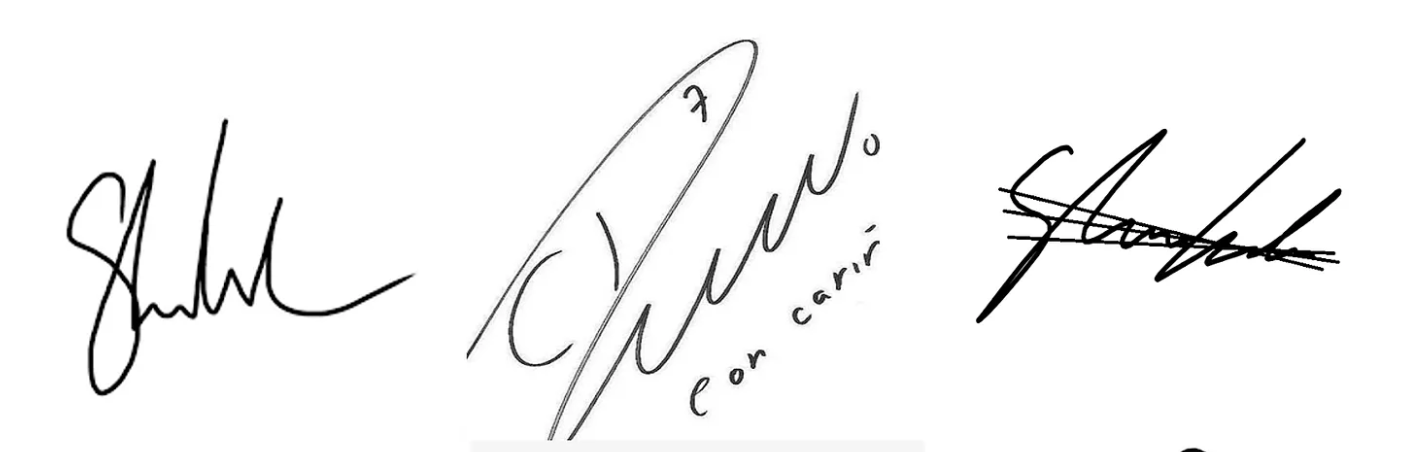

In [1]:
# Insert Images
from IPython.display import Image
Image(filename='Pictures/DiffHandwritings.png')

### Optical Character Recognition, commonly known as OCR, is a technology that converts different types of documents, such as scanned paper documents, PDF files, or images captured by a digital camera, into editable and searchable data. Essentially, it enables a computer to "read" text from printed or handwritten sources.

/var/folders/w9/n4f5mch54rs7r4cqyz2rxynm0000gp/T/ipykernel_87254/225151231.py:56: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 1, i + 1)


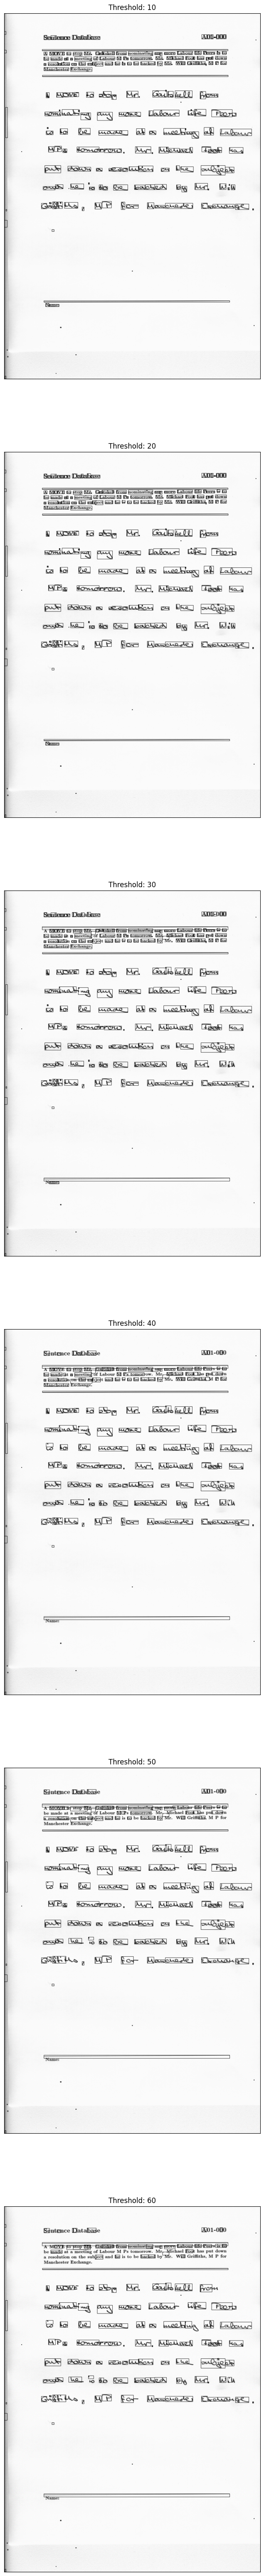

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load an image from the IAM dataset
image_path = '/Users/venkatakesavvenna/Sem5/OCR/archive_2/data/000/a01-000u.png'
image = cv2.imread(image_path)

# Step 2: Preprocess the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 3: Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150)

# Step 4: Perform morphological operations
kernel = np.ones((5, 5), np.uint8)
dilated = cv2.dilate(edges, kernel, iterations=1)
eroded = cv2.erode(dilated, kernel, iterations=1)

# Step 5: Find contours
contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 6: Merge close bounding boxes
def merge_close_boxes(bounding_boxes, threshold_distance):
    merged_boxes = []
    for box in bounding_boxes:
        merged = False
        for m_box in merged_boxes:
            if abs(box[0] - m_box[0]) < threshold_distance and abs(box[1] - m_box[1]) < threshold_distance:
                m_box[0] = min(box[0], m_box[0])
                m_box[1] = min(box[1], m_box[1])
                m_box[2] = max(box[2], m_box[2])
                m_box[3] = max(box[3], m_box[3])
                merged = True
                break
        if not merged:
            merged_boxes.append(list(box))
    return merged_boxes


thresholds = [10, 20, 30, 40, 50, 60]

plt.figure(figsize=(60, 80))
plt.subplot(2, 3, 1)

for i, threshold in enumerate(thresholds):
    image_new = gray.copy()
    bounding_boxes = [cv2.boundingRect(contour) for contour in contours]
    merged_boxes = merge_close_boxes(bounding_boxes, threshold_distance=threshold)

    for box in merged_boxes:
        x, y, w, h = box
        cv2.rectangle(image_new, (x, y), (x + w, y + h), (0, 255, 0), 2)

    plt.subplot(6, 1, i + 1)
    plt.imshow(cv2.cvtColor(image_new, cv2.COLOR_BGR2RGB))
    plt.title('Threshold: {}'.format(threshold))
    plt.xticks([])
    plt.yticks([])

plt.show()


### Now, Isolate each bounding box -> Our Hope is that we find a box around each individual letter, and because of that we can isolate each letter, and apply a KNN to it. But here we run into the problem, that we aren't able to get individual letters, from these bounding boxes, so there really is no point applying a KNN classification to it. 

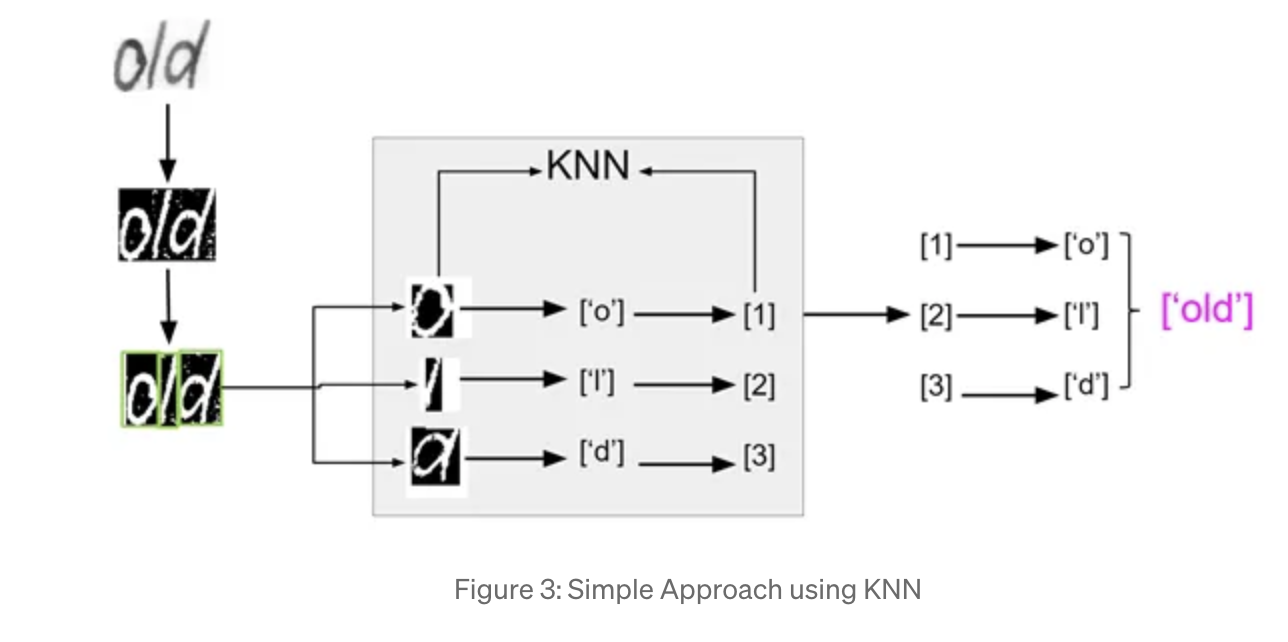

In [6]:
Image(filename='Pictures/KNN.png')

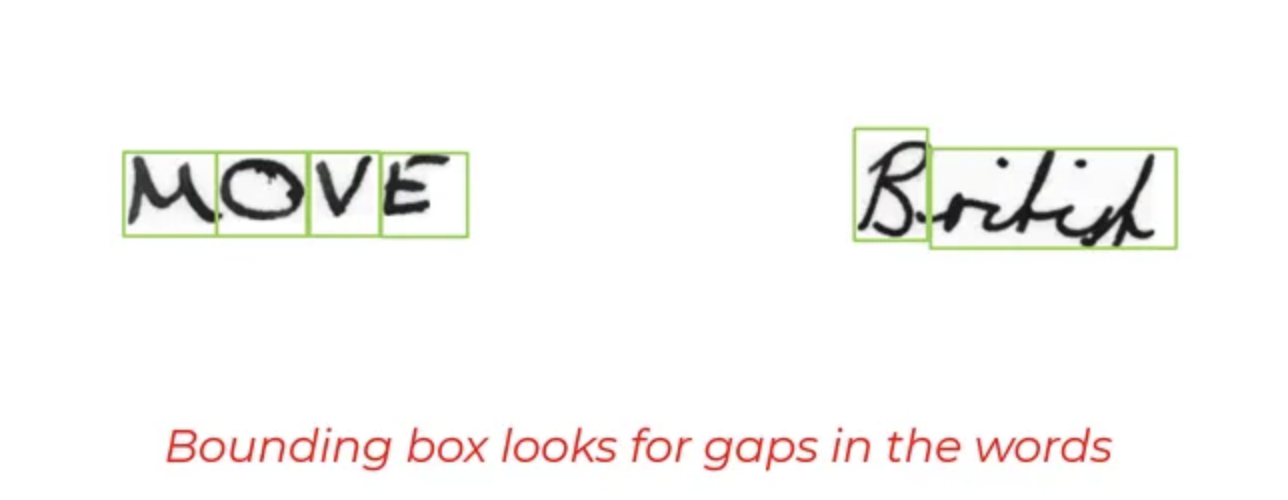

In [7]:
Image("./Pictures/ProblemKNN.png")

### With this we rule out the fact that we can do this with regular Image processing, and classical Machine learning techniques, we need to train a complex deep learning model to have any semblance of good accuracy